In [25]:
import re
import pandas as pd
import numpy as np



data = pd.read_csv("Embedded_HateSpeechDetection.csv")
print(data['Label'].value_counts())


0    10496
1     7100
Name: Label, dtype: int64


# Imbalanced data:
From the above output, we can observe that there is an imbalance in 'Label' column in the dataset as we can see there are 10496 instances of label '0' where as there are only 7100 instances of label '1'. This would significantly effect model training because models trained on this dataset might be biased towards the majority class (non-hate speech) and may not perform as well in identifying hate speech instances.

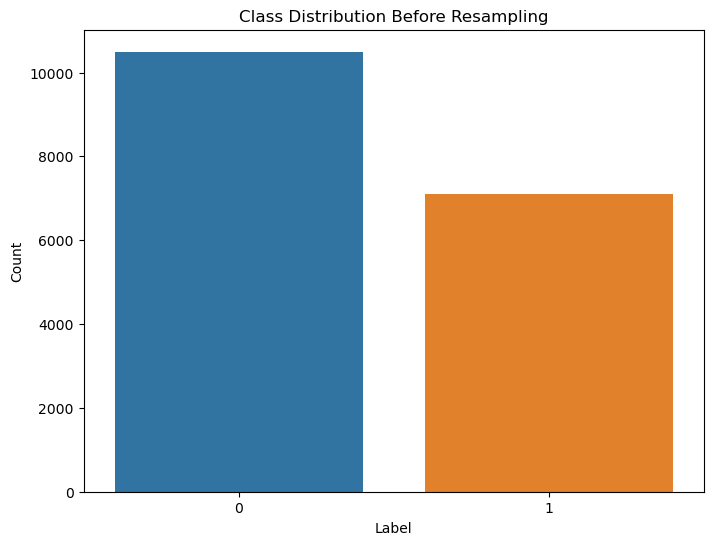

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes before sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

The training data can be balanced using resampling techniques like undersampling and oversampling.

# Undersampling:
we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.


In [28]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(data.drop(columns=['Label']),data['Label'])
print("Undersampled class distribution:\n", y_under.value_counts())

Undersampled class distribution:
 0    7100
1    7100
Name: Label, dtype: int64


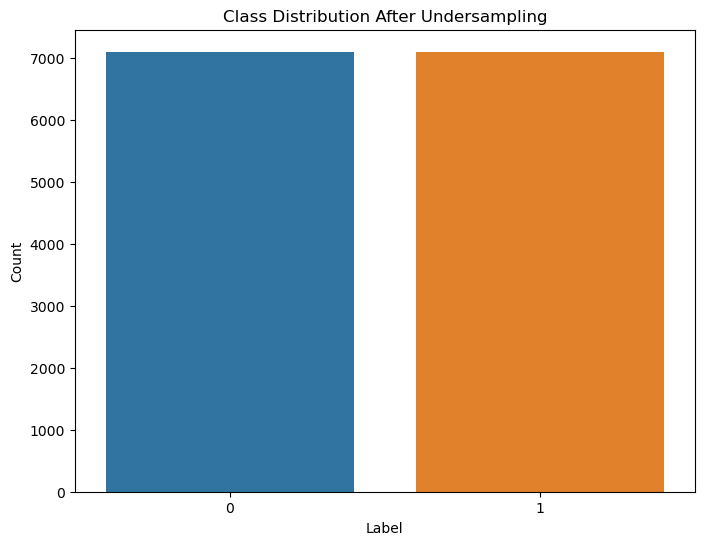

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_under)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Oversampling:
When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique used to handle imbalanced data is called oversampling.


In [30]:

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(data.drop(columns=['Label','Text']),data['Label'])
print("Oversampled class distribution:\n", y_over.value_counts())

Oversampled class distribution:
 0    10496
1    10496
Name: Label, dtype: int64


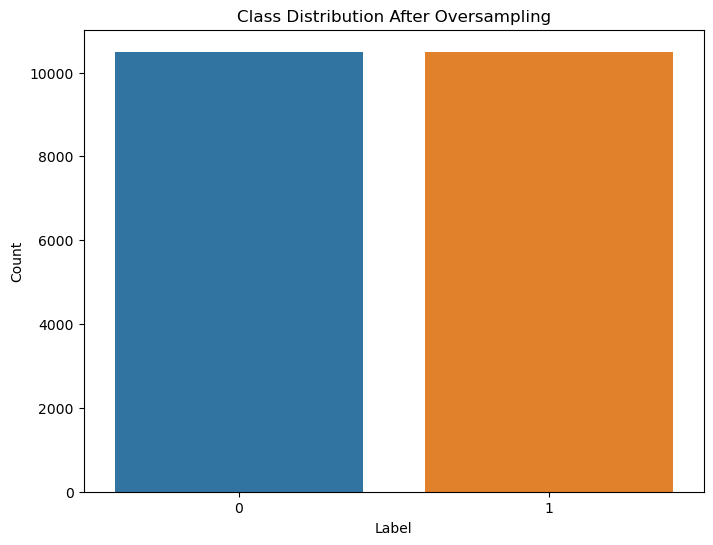

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_over)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

But generally, a random oversampler is not preferably used because it duplicates the minority instances to equalize with majority instances.

# SMOTE:
 Synthetic Minority Oversampling Technique or SMOTE, which is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t adon’ty new information to the model. In SMOTE new instances are synthesized from the existing data. 

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(data.drop(columns=['Label','Text','Tokens']),data['Label'])

print("Oversampled dataset shape using SMOTE:\n", y_smote.value_counts())

Oversampled dataset shape using SMOTE:
 0    10496
1    10496
Name: Label, dtype: int64


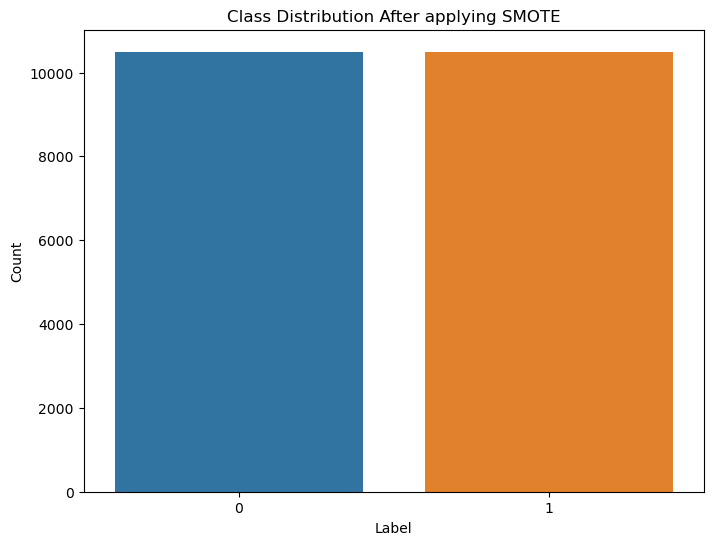

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Class Distribution After applying SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [37]:
balanced_data=pd.concat([X_smote,y_smote],axis=1)
balanced_data.to_csv("Balanced_HateSpeechDetection.csv",index=False)